

# **GREEDESTINATION EMPLOYEE ATTRITION PROJECT**




1.   The aim of this project is to analyse an employee data set containing data regarding employess leaving their jobs ad other importand employee data
2.   Finding pattefns in the data to get an insight into the various factors affecting the employee attrition(Quitting the job)





In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the data set and view the data set
main_df=pd.read_csv("/content/drive/MyDrive/greendestination/greendestination (1) (1).csv")
main_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#view data frame information
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
ar=(len(main_df[main_df["Attrition"]=="Yes"])/(len(main_df["Attrition"])))*100
print(f"The total attrition rate I.E rate of employees leaving their jobs is {round(ar,1)} %")


The total attrition rate I.E rate of employees leaving their jobs is 16.1 %


In [4]:
#cleaning outliers from the data set using the IQR method
for i in main_df.columns:
  if main_df[i].dtype=="int64":
    Q1=main_df[i].quantile(0.25)
    Q3=main_df[i].quantile(0.75)
    IQR=Q3-Q1
    main_df=main_df[main_df[i]>=Q1-1.5*IQR]
    main_df=main_df[main_df[i]<= Q3+1.5*IQR]

In [5]:
#Viewing the cleaned data set
main_df=main_df.reset_index(drop=True)
main_df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
2,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
3,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
4,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,...,4,80,1,5,1,2,5,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
695,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
696,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
697,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
#Creating a seperate data frame from the columns in the main_df containing numerical data type
int_df=main_df.select_dtypes(include=['int64'])

In [7]:
#Creating a correlation dataframe using the corr() function.The corr() function displays the correlation between various features of a data frame
cor=int_df.corr()

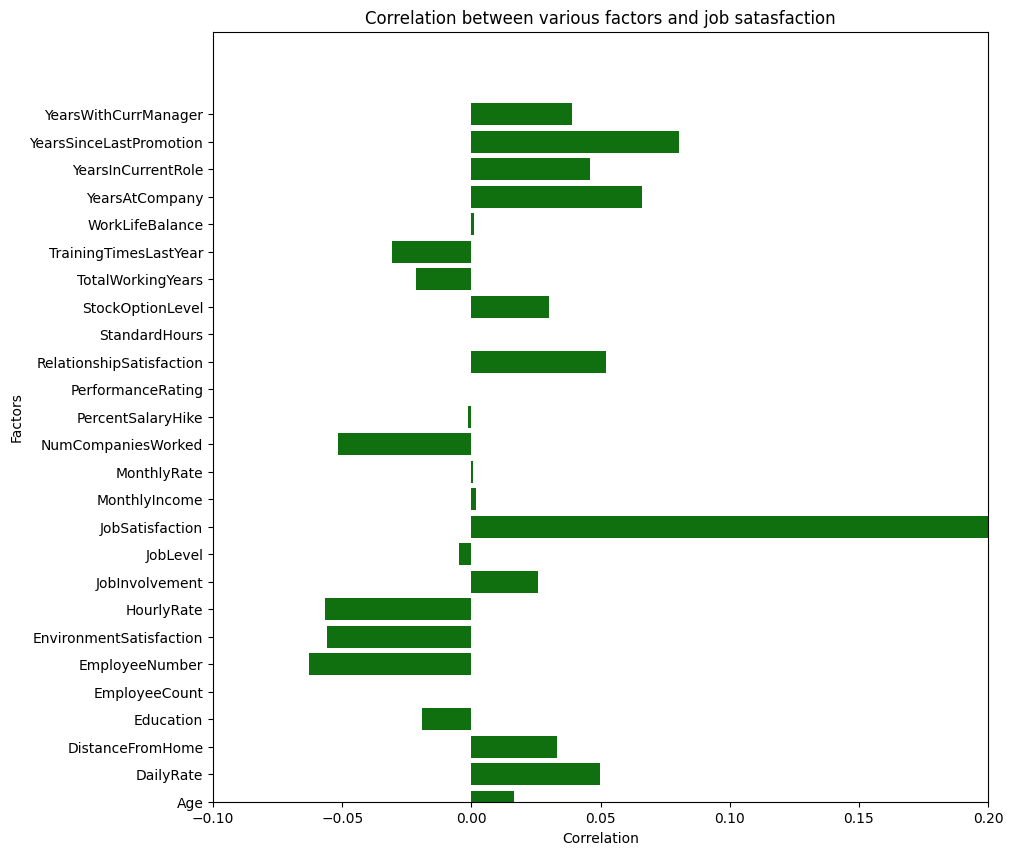

In [8]:
#Ploting the correlation data using the seaborn barplot method
plt.figure(figsize=(10,10))
sns.barplot(y=int_df.columns,x=cor["JobSatisfaction"],color="green")
plt.xlabel("Correlation")
plt.ylabel("Factors")
plt.axis([-0.1,0.2,0,28])
plt.title("Correlation between various factors and job satasfaction")

plt.show()

(-2.0, 4.0, 0.0, 4.0)

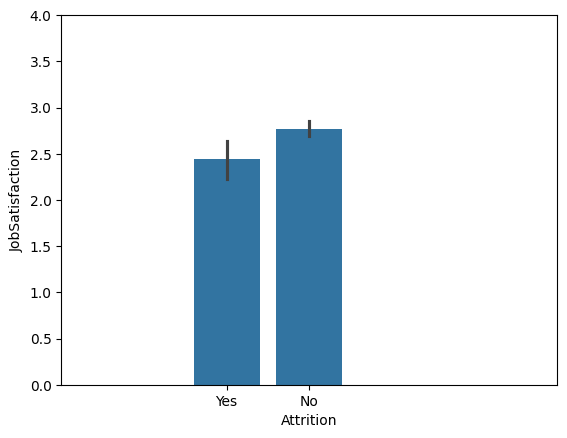

In [9]:
#Ploting jobsatisfaction data against attrition
plt.figure()
sns.barplot(x=main_df["Attrition"],y=main_df["JobSatisfaction"])
plt.axis([-2,4,0,4])

In [10]:
#From the plot above its clear that :-
#1) The average jobsatisfaction score of employees quitting their jobs is lower than those not leaving their jobs
#2)It can be concluded hence that  jobsatisfaction is an important factor in  employees leaving jobs

In [11]:
#Creating seperate dataframes for different job satisfaction scores
jbs4=main_df[main_df["JobSatisfaction"]==4]
jbs3=main_df[main_df["JobSatisfaction"]==3]
jbs2=main_df[main_df["JobSatisfaction"]==2]
jbs1=main_df[main_df["JobSatisfaction"]==1]

In [12]:
#Printing attrition rates(Number of employees with a particular job satisfaction score leaving their jobs/Total number of employees with that jobsatisfcation score)
# for different job satisfaction scores
print(f"Rate of attrition for employees with job satisfaction  4 is {len(jbs4[jbs4['Attrition']=='Yes'])/len(jbs4)}")
print(f"Rate of attrition for employees with job satisfaction  3 is {len(jbs3[jbs3['Attrition']=='Yes'])/len(jbs3)}")
print(f"Rate of attrition for employees with job satisfaction  2 is {len(jbs2[jbs2['Attrition']=='Yes'])/len(jbs2)}")
print(f"Rate of attrition for employees with job satisfaction  1 is {len(jbs1[jbs1['Attrition']=='Yes'])/len(jbs1)}")

Rate of attrition for employees with job satisfaction  4 is 0.11267605633802817
Rate of attrition for employees with job satisfaction  3 is 0.18309859154929578
Rate of attrition for employees with job satisfaction  2 is 0.19548872180451127
Rate of attrition for employees with job satisfaction  1 is 0.2357142857142857


In [13]:
# It can be established from the above statements that an employee with a jobsatisfaction score of 1 is twice more
#   likely to leave his job than an employee with a job satisfaction score of 4
# Lesser the job satisfaction higher are the chances of an employee leaving their job
#Below is a barplot demonstrating the same

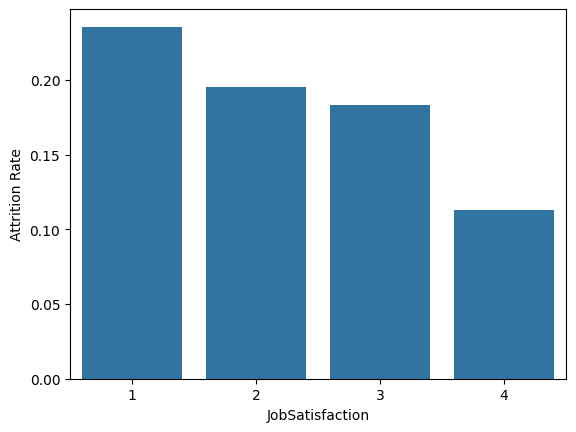

In [14]:

plt.figure()
sns.barplot(x=[1,2,3,4],y=[len(jbs1[jbs1['Attrition']=='Yes'])/len(jbs1),len(jbs2[jbs2['Attrition']=='Yes'])/len(jbs2),len(jbs3[jbs3['Attrition']=='Yes'])/len(jbs3),len(jbs4[jbs4['Attrition']=='Yes'])/len(jbs4)])
plt.xlabel("JobSatisfaction")
plt.ylabel("Attrition Rate")
plt.show()


<ipython-input-15-ee915aea4b03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=main_df["Attrition"],y=main_df["Age"],palette=["red","green"])


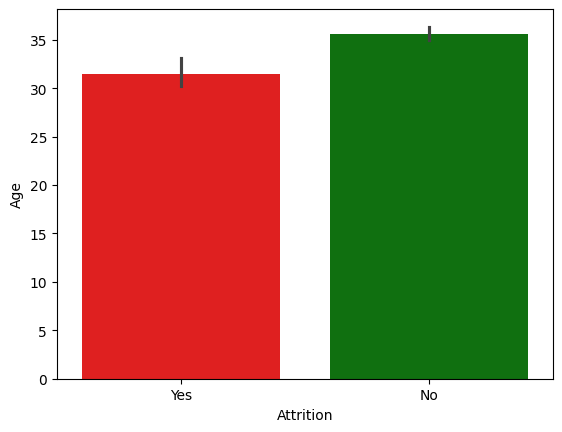

In [15]:
#A barplot showing the realation between attrition and age of employees
plt.figure()
sns.barplot(x=main_df["Attrition"],y=main_df["Age"],palette=["red","green"])
plt.show()

In [16]:
#It can be clearly noticed that the average age of an employee leaving their job is lesser than those not leaving their job

a1=main_df[main_df["Attrition"]=="Yes"]["Age"].mean()
a2=(main_df[main_df["Attrition"]=="No"]["Age"].mean())
print(f"Average age of  an employee leaving their job is {a1} ")
print(f"Average age of an employee not leaving their job is {a2} ")



Average age of  an employee leaving their job is 31.516393442622952 
Average age of an employee not leaving their job is 35.61005199306759 


In [17]:
#Its clear from the above information that a younger employee is more likely to quit their job than an older employee

<ipython-input-18-564c2a43bab8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=main_df["Attrition"],y=main_df["YearsAtCompany"],palette=["red","green"])


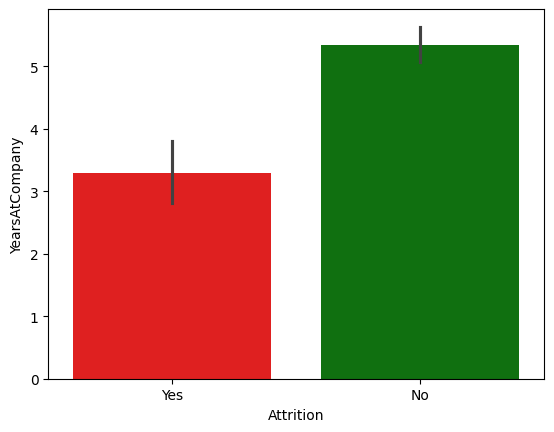

In [18]:
#using Barplot technique to plot average years at company of an employee for both attrition categories
plt.figure()
sns.barplot(x=main_df["Attrition"],y=main_df["YearsAtCompany"],palette=["red","green"])
plt.show()

In [19]:
# The average years an employee leaving the company has spent working for the company is significantly lower than that of those that arent leaving their jobs
# Hence it can be concluded from this that the longer an employee has worked for the company the lesser are his chances of leaving the job

<ipython-input-20-acf2c94e88d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=main_df["Attrition"],y=main_df["MonthlyIncome"],palette=["red","green"])


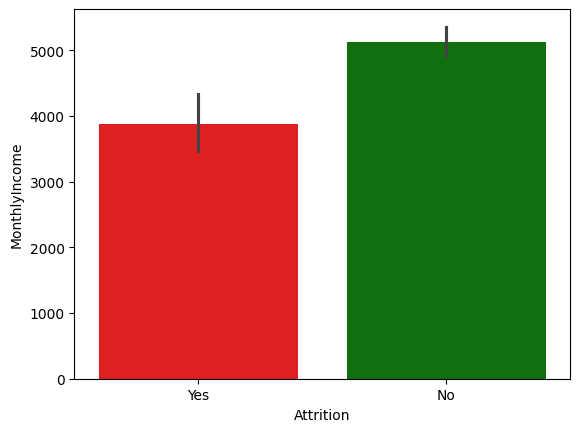

In [20]:
#barplot method used to show relationship between monthly income of the employees and their monthly incomes
plt.figure()
sns.barplot(x=main_df["Attrition"],y=main_df["MonthlyIncome"],palette=["red","green"])
plt.show()

In [21]:
#from the above plot it can be concluded
#The chances of an employee leaving his job increase as their monthly income decreases

<ipython-input-22-3d33c793ea1f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=main_df["Attrition"],y=main_df["WorkLifeBalance"],palette=["red","green"])


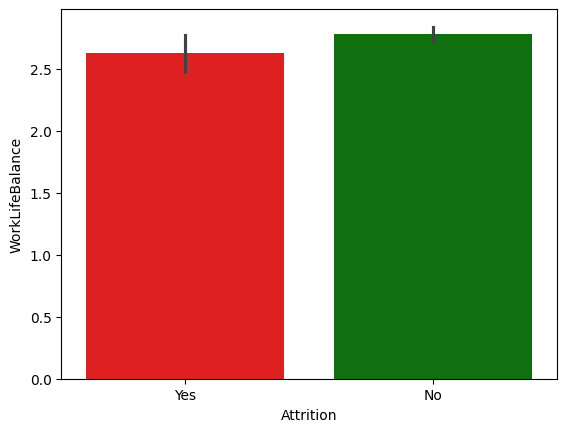

In [22]:
#barplot between attrition and work life balance
plt.figure()
sns.barplot(x=main_df["Attrition"],y=main_df["WorkLifeBalance"],palette=["red","green"])
plt.show()

In [23]:
#from the above plot it can be concluded that the work life balance doesnot have a very significant effect on the attrition rate

<ipython-input-24-e053d2858e59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=main_df["Attrition"],y=main_df["YearsWithCurrManager"],palette=["red","green"])


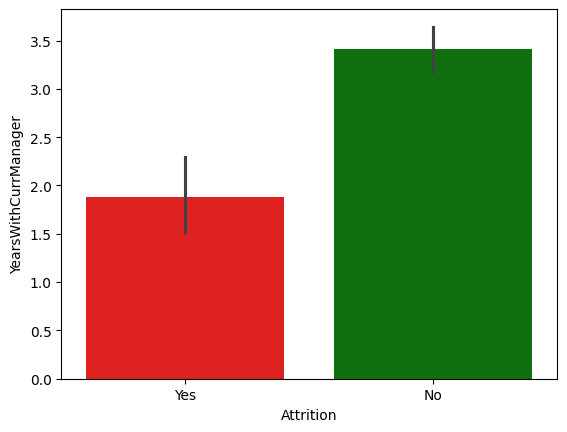

In [24]:
#barplot between attrition rate and Yearswith currentmanagaer
plt.figure()
sns.barplot(x=main_df["Attrition"],y=main_df["YearsWithCurrManager"],palette=["red","green"])
plt.show()

In [25]:
#from the above plot it can be concluded that:-
#The years worked under the current manager has a significant affect on the employees leaving their jobs
#More time an employee has worked under the current manager the less likely they are to leave their job

In [26]:
ar=[]
for i in range(0,9):
  ar.append((main_df[main_df["Attrition"]=="Yes"][main_df["NumCompaniesWorked"]==i]).size/(main_df[main_df["NumCompaniesWorked"]==i].size))


<ipython-input-26-ce11fe6ca7f7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ar.append((main_df[main_df["Attrition"]=="Yes"][main_df["NumCompaniesWorked"]==i]).size/(main_df[main_df["NumCompaniesWorked"]==i].size))
<ipython-input-26-ce11fe6ca7f7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ar.append((main_df[main_df["Attrition"]=="Yes"][main_df["NumCompaniesWorked"]==i]).size/(main_df[main_df["NumCompaniesWorked"]==i].size))
<ipython-input-26-ce11fe6ca7f7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ar.append((main_df[main_df["Attrition"]=="Yes"][main_df["NumCompaniesWorked"]==i]).size/(main_df[main_df["NumCompaniesWorked"]==i].size))
<ipython-input-26-ce11fe6ca7f7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ar.append((main_df[main_df["Attrition"]=="Yes"][main_df["NumCompaniesWorked"]==i]).size/(main_df[main_df["NumCompaniesWorked"]==i].siz

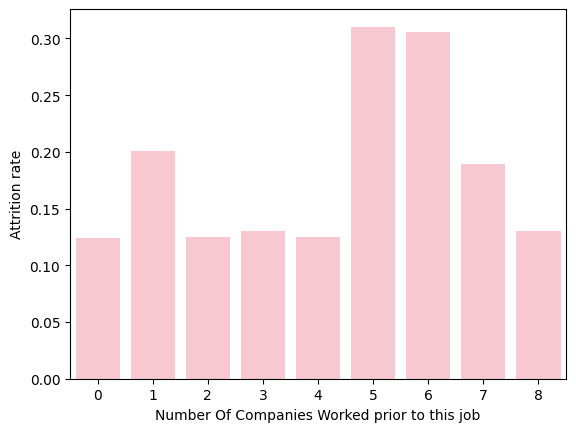

In [ ]:
#Barplot between attrition rate and number of companies an employee has worked prior to the current job
plt.figure()
sns.barplot(x=range(0,9),y=ar,color="pink")
plt.xlabel("Number Of Companies Worked prior to this job")
plt.ylabel("Attrition rate")
plt.show()

In [27]:
#It can be unederstood from the above barplot:-
# Employees that have worked for more than 4 companies prior to the current job are more likely to leave their jobs
#In general it can be concluded that higher the prior experience more likely an employee is to leave hisn job
# employees with no prior experience I.E freshers are the least likely to their jobs

In [ ]:
l1=(main_df[(main_df["Gender"]=="Male") & (main_df["Attrition"]=="Yes")].size)/(main_df[main_df["Gender"]=="Male"].size)
l2=(main_df[(main_df["Gender"]=="Female") & (main_df["Attrition"]=="Yes")].size)/(main_df[main_df["Gender"]=="Female"].size)


<ipython-input-23-78dd0c325e68>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Male","Female"],y=[l1,l2],palette=["black","yellow"])


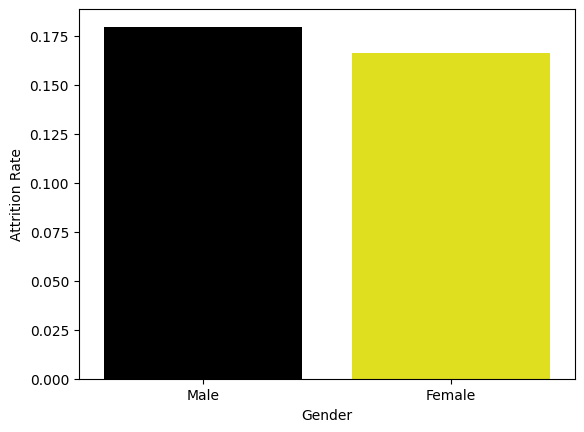

In [ ]:
#barplot displaying the relation between gender of employees and attrition rate
plt.figure()
sns.barplot(x=["Male","Female"],y=[l1,l2],palette=["black","yellow"])
plt.xlabel("Gender")
plt.ylabel("Attrition Rate")
plt.show()

In [28]:
#From the above plot it can be concluded:-
#Male employees are more likely to quit their jobs compared to female employees though the disparity is not very significant


In [30]:
n1=((main_df[(main_df["MaritalStatus"]=="Married") & (main_df["Attrition"]=="Yes")]).size)/((main_df[main_df["MaritalStatus"]=="Married"]).size)
n2=((main_df[(main_df["MaritalStatus"]=="Single") & (main_df["Attrition"]=="Yes")]).size)/((main_df[main_df["MaritalStatus"]=="Single"]).size)

<ipython-input-31-ccf86833e968>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Married","Single"],y=[n1,n2],palette=["red","green"])


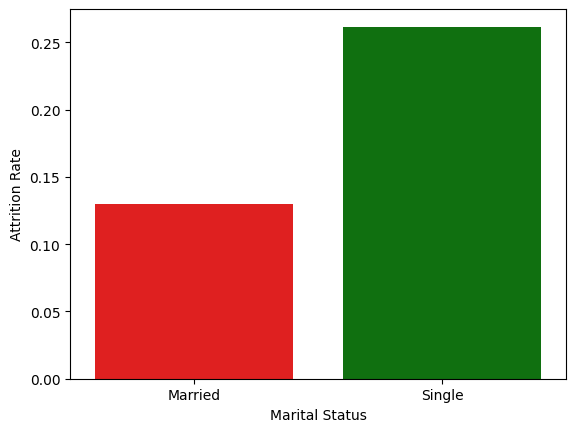

In [31]:
#Barplot showing relation between marital status of the employees and attrition rate
plt.figure()
sns.barplot(x=["Married","Single"],y=[n1,n2],palette=["red","green"])
plt.xlabel("Marital Status")
plt.ylabel("Attrition Rate")
plt.show()

In [32]:
#From the above plot it can be concluded that:-
#Unmarried or single employees have a significantly higher chance of quitting their jobs than their married collegues


<ipython-input-26-bb200d884168>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=main_df["Attrition"],y=main_df["HourlyRate"],palette=["red","green"])


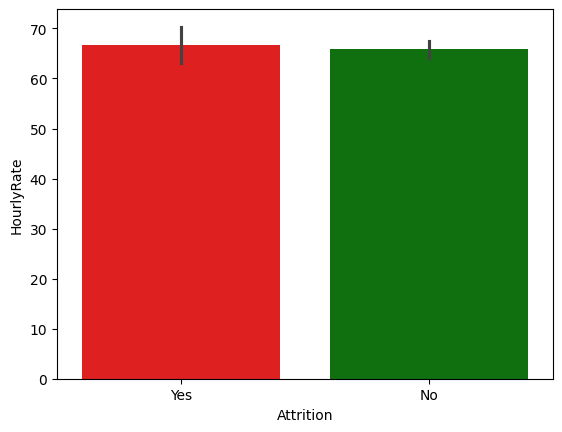

In [ ]:
plt.figure()
sns.barplot(x=main_df["Attrition"],y=main_df["HourlyRate"],palette=["red","green"])
plt.show()

In [33]:
#From the above plot it can be seen that the hourly rate doesnt have a significant effect on the attrition at all

## **SUMMARY OF CONCLUSIONS **



1. The total attrition rate I.E rate of employees leaving their jobs is 16.1 %
2. Jobsatisfaction is an important factor in  employees leaving jobs
3. Lesser the job satisfaction higher are the chances of an employee leaving
   their job
4. The average age of an employee leaving their job is lesser than those not
   leaving their job  
5. Average age of  an employee leaving their job is 31.5 years

6. Average age of an employee not leaving their job is 35.6 years

7. The longer an employee has worked for the company the lesser are their
   chances of leaving the job
8. The chances of an employee leaving his job increase as their monthly income
   decreases
9. Work life balance doesnot have a very significant effect on the attrition
   rate
10. The years worked under the current manager has a significant affect on the
   employees leaving their jobs
11. More time an employee has worked under the current manager the less likely
   they are to leave their job
12. Employees that have worked for more than 4 companies prior to the current
   job are more likely to leave their jobs
11. In general it can be concluded that higher the prior experience more likely
   an employee is to leave hisn job
12. Amongst all experience levels freshers are the least likely to leave their
   jobs
13. Male employees are more likely to quit their jobs compared to female
   employees though the disparity is not very significant
14. Unmarried or single employees have a significantly higher chance of  
   quitting their jobs than their married collegues
15. Hourly,monthly and daily rate dont have a significant affect on the
   attrition at all








In [ ]:
#The total attrition rate I.E rate of employees leaving their jobs is 16.1 %
#jobsatisfaction is an important factor in  employees leaving jobs
#Lesser the job satisfaction higher are the chances of an employee leaving their job
#The average age of an employee leaving their job is lesser than those not leaving their job
#Average age of  an employee leaving their job is 31.5 years
#Average age of an employee not leaving their job is 35.6 years
#The longer an employee has worked for the company the lesser are their chances of leaving the job
#The chances of an employee leaving his job increase as their monthly income decreases
#Work life balance doesnot have a very significant effect on the attrition rate
#The years worked under the current manager has a significant affect on the employees leaving their jobs
#More time an employee has worked under the current manager the less likely they are to leave their job
#Employees that have worked for more than 4 companies prior to the current job are more likely to leave their jobs
#In general it can be concluded that higher the prior experience more likely an employee is to leave hisn job
#Amongst all experience levels freshers are the least likely to leave their jobs
#Male employees are more likely to quit their jobs compared to female employees though the disparity is not very significant
#Unmarried or single employees have a significantly higher chance of quitting their jobs than their married collegues
# Hourly,monthly and daily rate dont have a significant affect on the attrition at all



